# Week 5 - Bivariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [90]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns

# 1. Lesson: Bivariate graphs

In this lesson, we'll consider some bivariate plots: scatter plots, line plots, waterfall plots, area plots, and pair plots.  We'll also look at bivariate statistics such as correlations, ratios, and percentages.  First, let's create some data.

In [91]:
np.random.seed(0)
numpoints = 100
lesson_series_uniform = np.round(np.random.random(size = numpoints) * 100, 2)
lesson_series_base = np.round(np.random.random(size = numpoints)**2 * 100, 2)
lesson_series_skewed = lesson_series_base + np.random.normal(scale = 10, size = numpoints)
lesson_series_reverse = 100 - lesson_series_base + np.random.normal(scale = 10, size = numpoints)

This scatter plot puts one series against another.  The two series are anticorrelated - one goes up when the other goes down.

<Axes: >

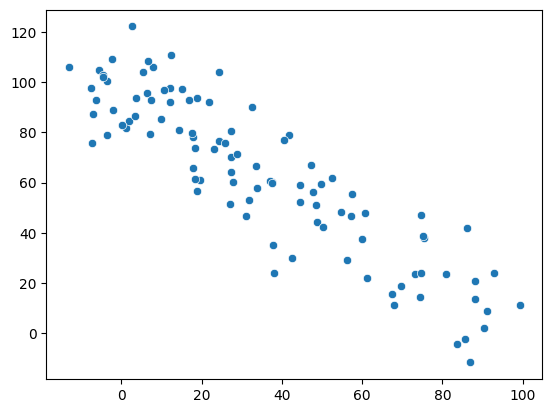

In [92]:
sns.scatterplot(x = lesson_series_skewed, y = lesson_series_reverse)

This pair plot compares three series against one another.  The diagonal shows the histogram of each series, while the non-diagonal entries plot two different series against each other.  The result in column 1, row 2 is a scatter plot that compares series #1 with series #2.  In effect, when the logic of the pair plot tells us to plot a series against itself (column 1, row 1), we draw a histogram.  (It would be silly to draw a scatter plot of a series against itself).  Because series #1 is not based on the "base" series, it is not correlated with series #2 or series #3, so the four scatter plots that compare series #1 to #2 and #3 look patternless.  The two scatter plots that compare series #2 with series #3 do appear to be correlated due to the "base" series that they share in common.

In [93]:
df = pd.DataFrame(np.array([lesson_series_uniform, lesson_series_skewed, lesson_series_reverse]).T, columns = ['uniform', 'skewed', 'reverse'])

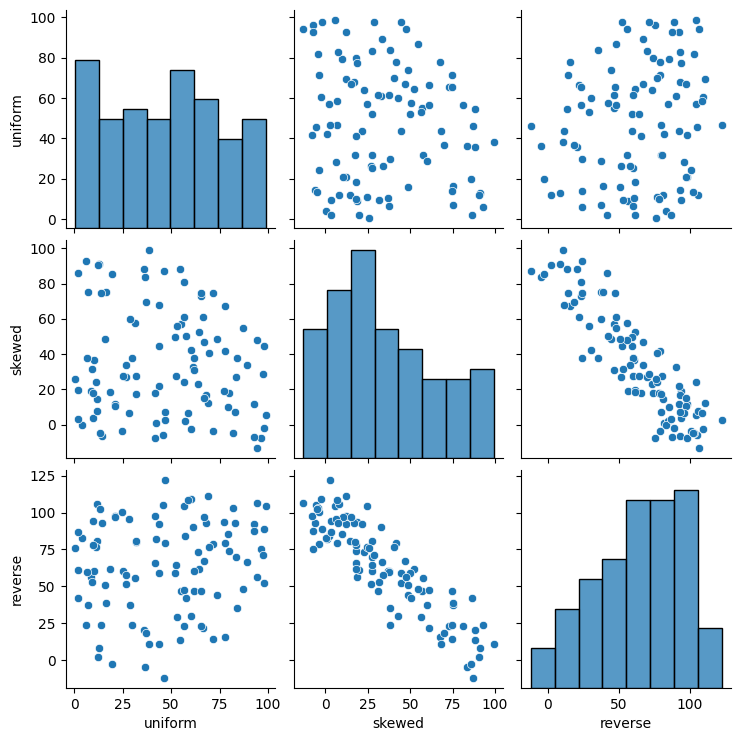

In [94]:
sns.pairplot(df)

We can compute the correlation coefficience between each pair.

In [95]:
print("Correlations:", df.corr())

Correlations:           uniform    skewed   reverse
uniform  1.000000 -0.145022  0.149771
skewed  -0.145022  1.000000 -0.894549
reverse  0.149771 -0.894549  1.000000


This shows that there is a strong negative correlation between the "skewed" and "reverse" datasets (a larger negative number in row 2, column 3 and in row 3, column 2) and almost no correlation between the "uniform" dataset and the others (the much smaller numbers at those locations in the table.)

Q: What is a correlation telling us?

If the correlation is large (close to 1) it tells us that the two variables are usually either both large or both small in value.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the lower left to upper right.

If the correlation is very negative (close to -1), it tells us that when one variable is large, the other is small.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the upper left to lower right.

If the correlation is zero, it tells us that the two variables, plotted on a scatter plot, would form a cloud.  The cloud can have different shape - for instance, it could be square or circular - but it cannot look like a diagonal line.  Knowing the value of one variable would tell you nothing about the value of the other variable.  (At least, it would not tell you whether the other variable is large or small).

The correlation coefficients above are called by the letter R.  R can be positive or negative, and lies between -1 and 1.  If we square R, we get a value called $R^2$ which is sometimes used to describe the correlation.  Unless R = 0 or 1, $R^2$ will be smaller in magnitude than R (and always positive), which means that it is very important to know if you are talking about R or $R^2$.  Since the values above can be negative, you can know for sure that they are R values, not $R^2$.

Q: How do you decide if a correlation is strong?

It depends on the application.  Some sources say that a correlation of R = 0.7 or 0.8 is strong, but in other applications (say, the social sciences) a correlation of 0.5 might be considered quite strong.  It is not unusual for social scientists to report correlations even as low a 0.2 as being important.

Q: What is the purpose of finding a correlation?

Here are a few:

1. Variables that are correlated with a target variable might be especially useful in predicting that variable.  This might also suggest that a linear model could work.  On the other hand, just because there are no pairwise correlations doesn't mean that a linear model won't work.  For example, if you select X, Y, and Z from this list of four possibilities: \[\[X = 1, Y = 0, Z = 0], \[X = 0, Y = 1, Z = 0], \[X = 0, Y = 0, Z = 1], \[X = 1, Y = 1, Z = 1]] then any two variables are completely uncorrelated, but the sum of the three is usually 1.  So the linear model Z = 1 - X - Y is accurate in three out of four cases even though all pairwise correlations are zero.

2. Variables that are very correlated with each other might be redundant.  In the extreme case, two variables that have a correlation of 1.0 are "linearly dependent" - they essentially provide the same information.  For example, if one column is a height in inches, and another is a height in centimeters, then they are redundant.  Moreover, if you use two highly correlated variables as predictors, the results will be somewhat unpredictable.  For example, if HI is the height in inches and HC is the height in centimeters, then the following formulas are all equivalent: HC, 2.54 * HI, 0.5 * HC + 1.27 * HI, 1001 * HC - 2540 * HI.  So there's no knowing which one you'll get if you try to build a model based on these variables.  The last one in particular is a little bit surprising, given the large coefficients, but it could very well be the result of a linear regression analysis.

3. Correlation can help you to detect problems with the data.  If two variables are correlated but shouldn't be, or if they're not correlated but should be, there might be something wrong with the data.  It's important to test the data to see if it makes sense.

4. Correlations can be interesting things to report.  If your client or organization is asking for a verbal explanation of the dataset, they might be interested in knowing about any correlations for reasons of their own.

A waterfall chart shows a value after a sequence of inputs and outputs.

In [96]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name='This title is not displayed',
    orientation='v',
    measure=['absolute','relative','relative','relative','relative'],
    x=["2023-Jan", "receipts-in", "interest-in", "expenses-out", "interest-out", "2024-Jan"],
    textposition='outside',
    text=['Total','after-receipts','after-interest','after-expenses','after-interest'],
    y=[123.45,42.08,21.97,-54.31,-50.23],
    connector=dict(line=dict(color='rgb(63, 63, 63)'))
))

fig.update_layout(
    title='Waterfall Plot',
    showlegend=False
)
fig.update_yaxes(range=[-1,230])
fig.show()

A line plot is typically associated with a time or date range.  It shows how a variable rises and falls over a period of time.

/tmp/ipykernel_2042/2082488306.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='None'>

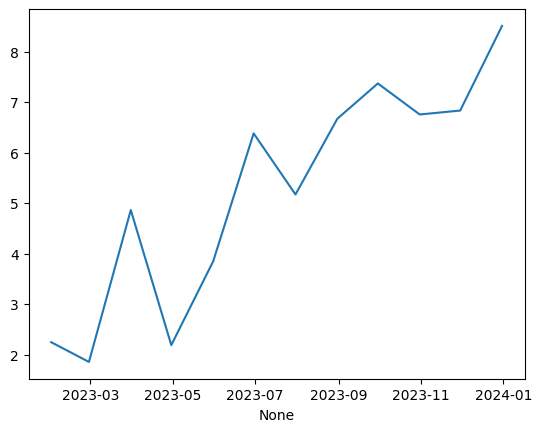

In [97]:
numdates = 12
time_series = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
sns.lineplot(x = datearray, y = time_series)

An area plot stacks one curve on top of another.  In the graph below, the top line shows the sum of the two series (ser1 + ser2) while the bottom line just shows ser1.

<Axes: >

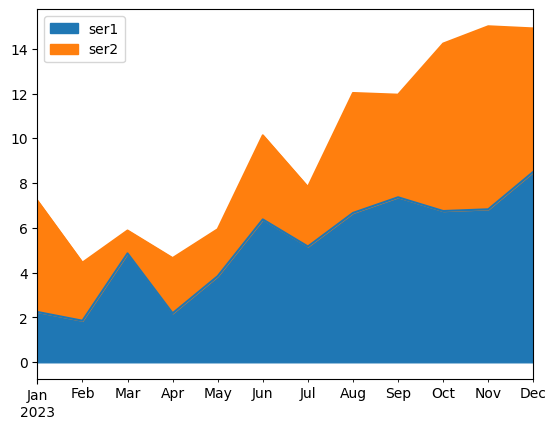

In [98]:
time_series_2 = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 2. Weekly graph question

Below is a pair plot showing the correlation between the levels of chemical A, B, and C in a water sample.  If you had to choose just _three_ of the nine graphs in the pair plot to display, which would you choose?  How would you alter the way these graphs are displayed to make them clearer or more informative?  Would you fit any of these graphs to a line or curve?  Why or why not?  What if you had to choose just _one_?  What if you had to choose _six_?

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(0)
num_data = 100
base_data = np.random.random(size = num_data)
chem1 = base_data + np.random.normal(size = num_data) * 0.1
chem2 = base_data**2 + np.random.normal(size = num_data) * 0.1
chem3 = 1 - base_data + np.random.normal(size = num_data) * 0.1
df_chem = pd.DataFrame({'chem1':chem1,'chem2':chem2,'chem3':chem3})

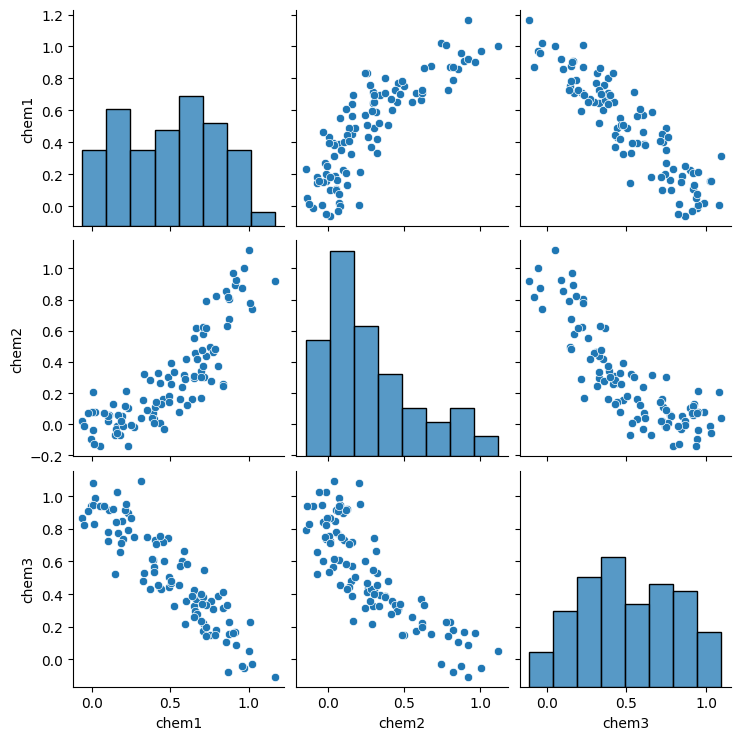

In [100]:
sns.pairplot(df_chem)

### Answers to Weekly Graph Question:

**If you had to choose just _three_ of the nine graphs in the pair plot to display, which would you choose?**  

Graphs 2, 3, and 5. Graph 2 shows a strong positive correlation. Graph 3 shows a strong negative correlation, which is important if a decrease in one chemical matters more than an increase. Graph 5 helps in understanding the distribution (which appears skewed) and identifying patterns.

**How would you alter the way these graphs are displayed to make them clearer or more informative?**  

Graph 2 and 3 adjustments: 
- Reduce marker size to prevent overcrowding and overlapping of data points. 
- Increase transparency so that dense areas are more visible. 
- Adjust axis scaling so that the x and y axes are more balanced, preventing the trend from being exaggerated.

Graph 5 adjustments: 
- Add a normalization line to identify what is considered a normal level. 
- Change the color of the most important bars to highlight key values. 
- Increase the number of bins on the x-axis for more detail, rather than just having 0.0, 0.05, and 1.0. 
- Make axis scaling more even to maintain an accurate representation of the distribution.
 
**Would you fit any of these graphs to a line or curve?  Why or why not?**  
 
- Graph 2 - fitting a curve would work because the pattern does not look perfectly linear.
- Graph 3 - a straight line here would be a better fit here since it shows a clearer negative correlation.
- Graph 5 - neither, because histograms show distributions, not trends. However, a normalization curve could be used to compare the data against a standard distribution. 

**What if you had to choose just _one_?  What if you had to choose _six_?**

- Graph 2 appears to be the most useful because it shows a clear positive correlation, which may be important for identifying a specific chemical in water.
- If the choice were expanded to six graphs, Graphs 2, 3, and 5 would be selected first. Graphs 1, 6, and 8 could also be beneficial for further analysis. Graphs 1 and 9 show the distributions of Chem1 and Chem3, completing the dataset's distribution view, assuming that Chem A, B, and C are equally important for analysis (such as in water testing).
- Graph 8 is particularly interesting because it provides another correlation insight. A large number of data points are concentrated between approximately x: 0.25 and y: 0.7–1.1, with relatively high y-values. While there is no information about the significance of the highest y-axis values, this concentration could be notable for further testing.

# 3. Homework - Reproducing Pair Plot Graphs

I'm going to show you some Pair Plot (Scatter and Histogram) graphs.  I'd like you to generate some data that will generate those graphs.

Example: this cloud involves a match between two normal distributions.

<Axes: xlabel='data1', ylabel='data2'>

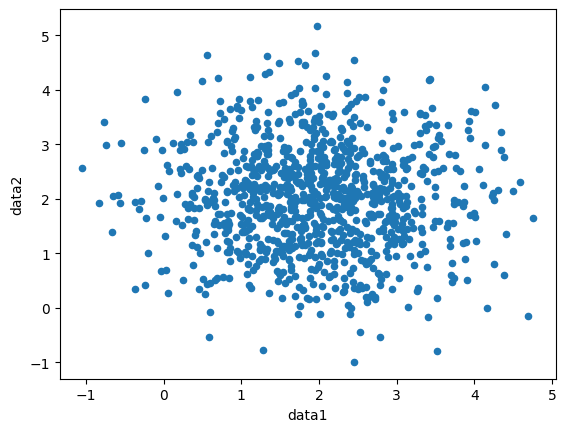

In [101]:
num_points = 1000
np.random.seed(0)
data1 = np.random.normal(size = num_points) + 2
data2 = np.random.normal(size = num_points) + 2
df_twonorm = pd.DataFrame({"data1":data1,"data2":data2})
df_twonorm.plot.scatter(x = "data1", y = "data2")

Problem: Can you design data that will generate the following scatter plot?  You may need to join multiple series to make one big series for the y-axis data.  That will allow you to create the two clouds. Use Google or ChatGPT to find the function that does that.  It is okay if the precise numbers are not re-created; just the general shape: two vertically separated clouds of points.

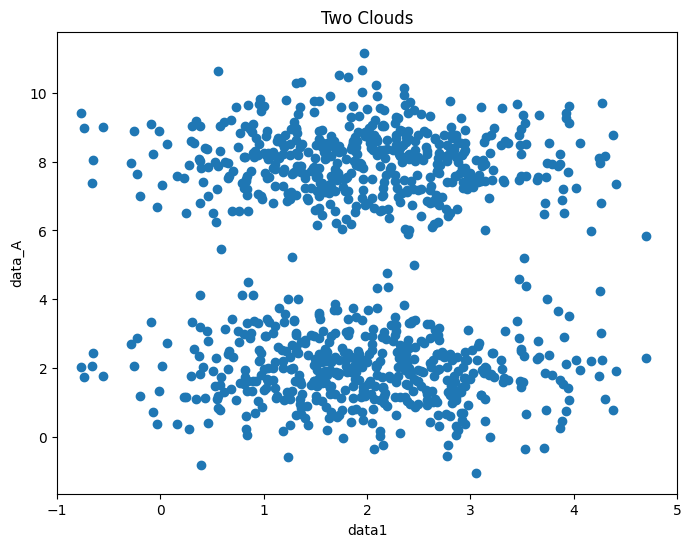

In [102]:
import matplotlib.pyplot as plt

### Creating two vertically separated clouds of points

np.random.seed(0)

# Each cloud will have 500 points
num_points = 500  

# Generate points
data1 = np.random.normal(size=num_points) + 2
data2_lower = np.random.normal(size=num_points) + 2 
data2_upper = np.random.normal(size=num_points) + 8  

# Two clouds combined
x_combined = np.concatenate([data1, data1]) 
y_combined = np.concatenate([data2_lower, data2_upper])  

df_twonorm = pd.DataFrame({"data1": x_combined, "data2": y_combined})

# Create plot
plt.figure(figsize=(8,6))
plt.scatter(df_twonorm["data1"], df_twonorm["data2"])
plt.xlabel("data1")
plt.ylabel("data_A") 
plt.title("Two Clouds")
plt.xlim(-1, 5)
plt.show()


In [103]:
from IPython.display import Image
Image("twoclouds.png")

FileNotFoundError: No such file or directory: 'twoclouds.png'

FileNotFoundError: No such file or directory: 'twoclouds.png'

<IPython.core.display.Image object>

Challenge problem!  Hint: you will need two series, and three segments of the first series will connect with the three segments of the second series.

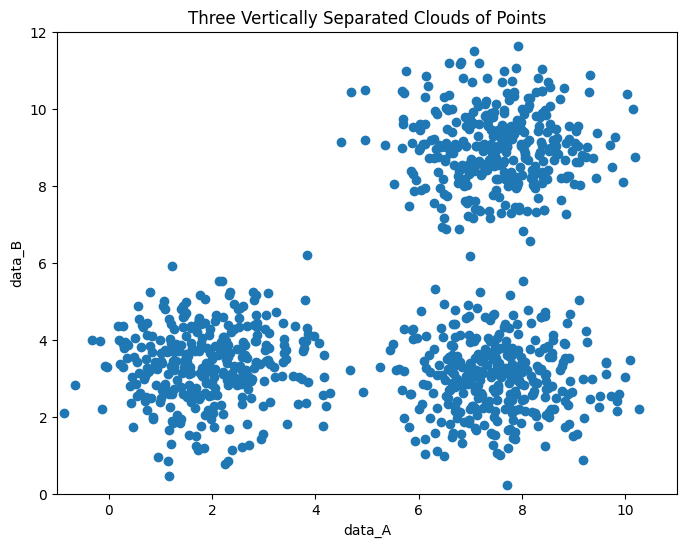

In [104]:
### Creating three vertically separated clouds of points

np.random.seed(0)

# Each cloud will have 333 points
num_points = 333  

# Generate points
x1 = np.random.normal(loc=1.9, scale=1.0, size=num_points)  
y1 = np.random.normal(loc=3.5, scale=1.0, size=num_points)  

x2 = np.random.normal(loc=7.5, scale=1.0, size=num_points) 
y2 = np.random.normal(loc=3, scale=1.0, size=num_points)  

x3 = np.random.normal(loc=7.5, scale=1.0, size=num_points)  
y3 = np.random.normal(loc=9, scale=1.0, size=num_points)  

# Combine all three clouds
x_combined = np.concatenate([x1, x2, x3])
y_combined = np.concatenate([y1, y2, y3])


df_three_clouds = pd.DataFrame({"data_A": x_combined, "data_B": y_combined})

# Create plot
plt.figure(figsize=(8,6))
plt.scatter(df_three_clouds["data_A"], df_three_clouds["data_B"])
plt.xlabel("data_A")
plt.ylabel("data_B")
plt.title("Three Vertically Separated Clouds of Points")
plt.xlim(-1, 11) 
plt.ylim(0, 12) 
plt.show()


In [105]:
from IPython.display import Image
Image("threeclouds.png")

FileNotFoundError: No such file or directory: 'threeclouds.png'

FileNotFoundError: No such file or directory: 'threeclouds.png'

<IPython.core.display.Image object>

Would you expect to see a correlation for this challenge problem?  (Hint: does knowing the value of data_A tell you anything about the value of data_B - in particular, whether it is large or small?)  If you managed to reproduce the graph using data, test it yourself using the corr() function.

**Graph observation**

No correlation is visually observed because, while the values are clustered in three groups, knowing data_A does not consistently predict data_B. For instance, for data_A between -1 and 5, all points stay in the lower part of the graph (between 0 and 6), whereas for data_A between 5 and 11, points appear both in the lower and upper quartiles. This means that knowing the value of data_A does not help predict whether data_B will be high or low. Since data_B values appear in different vertical positions for the same data_A range, there is no consistent relationship between them.

In [106]:
# Check the correlation by using corr() function
df_three_clouds.corr()


,data_A,data_B
data_A,1.000000,0.407561
data_B,0.407561,1.000000


**Conclusion on the challenge problem**

While the scatter plot initially appeared uncorrelated due to the three distinct clusters, the corr() function shows some positive correlation of 0.407. This means that, in general, as data_A increases, data_B tends to increase as well, but not in a strictly linear way. Technically, the values on both axes start lower (x between -1 and 5, y between 0 and 6) and end at higher ranges (x between 5 and 11, y between 7 and around 12), suggesting an upward pattern. However, the three-cluster structure weakens the correlation, as seen in the empty top-left region, which has no dots. Thus, while some correlation is present, it is not strong or particularly reliable for in-depth analysis.

Here is a histogram.  Can you provide data that will approximately re-create this histogram?

It is okay if the precise numbers are not re-created; just the general shape: tailing off on either side, but tailing off to a nonzero number.  (In this case, about 300).

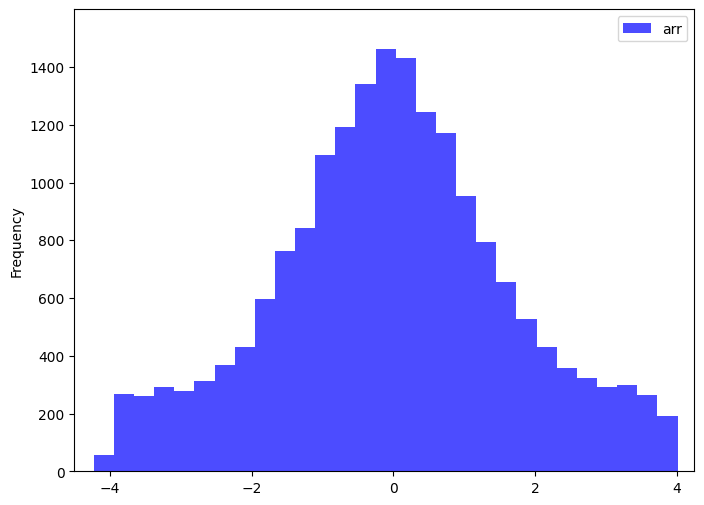

In [107]:
np.random.seed(0)

# Generate a normal distribution
data = np.random.normal(loc=0, scale=1.13, size=11500)  

# Add noise 
noise = np.random.uniform(low=-4, high=3.9, size=7000)  
data = np.concatenate([data, noise])

# Create histogram
plt.figure(figsize=(8,6))
plt.xlim(-4.5, 4.25) 
plt.xticks(np.arange(-4, 5, 2))
plt.ylim(0, 1600)  
plt.yticks(np.arange(0, 1600, 200))  
plt.hist(data, bins=30, density=False, alpha=0.7, color="blue", label="arr")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [108]:
from IPython.display import Image
Image("histogram.png")

FileNotFoundError: No such file or directory: 'histogram.png'

FileNotFoundError: No such file or directory: 'histogram.png'

<IPython.core.display.Image object>

Create a line plot that shows a sales volume of soft drinks that decreases, then increases over the course of a year, in a U-shaped curve, but with some noise.

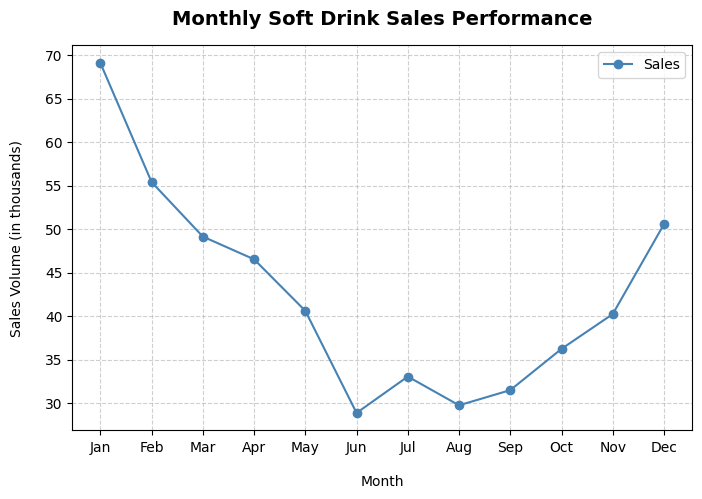

In [109]:
np.random.seed(0)

# Add month labels
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Generate months
months = np.arange(1, 13)

# U-shaped sales volume trend
base_sales = 0.8 * ((months - 7.5) ** 2) + 30 

# Add noise
noise = np.random.normal(loc=0, scale=3, size=12)  
sales = base_sales + noise

# Create plot
plt.figure(figsize=(8, 5))
plt.plot(months, sales, marker='o', linestyle='-', color='steelblue', label="Sales")
plt.xlabel("Month", labelpad=15)
plt.ylabel("Sales Volume (in thousands)", labelpad=15)
plt.title("Monthly Soft Drink Sales Performance", fontsize=14, fontweight='bold', pad=15)
plt.xticks(np.arange(1, 13), month_labels)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Create an area plot that shows the sales volume for two brands of soft drinks, one of which is increasing then decreasing, the other decreasing then increasing.

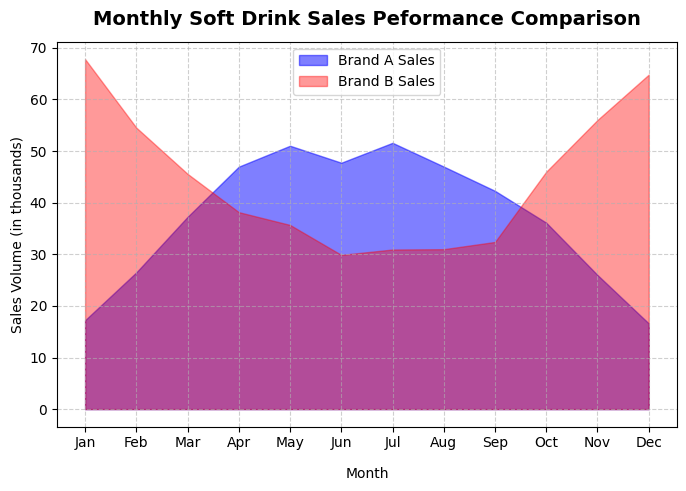

In [110]:
np.random.seed(0)

# Generate months
months = np.arange(1, 13)

# Brand A (sales increase then decrease)
brand_a_sales = -1.2 * (months - 6.5) ** 2 + 50  

# Brand B (sales decrease then increase)
brand_b_sales = 1.2 * (months - 6.5) ** 2 + 30  

# Add noise
noise_a = np.random.normal(loc=0, scale=2, size=12)
noise_b = np.random.normal(loc=0, scale=2, size=12)

# Apply noise
brand_a_sales += noise_a
brand_b_sales += noise_b

# Create plot
plt.figure(figsize=(8, 5))
plt.fill_between(months, brand_a_sales, color="blue", alpha=0.5, label="Brand A Sales")
plt.fill_between(months, brand_b_sales, color="red", alpha=0.4, label="Brand B Sales")

plt.xlabel("Month", labelpad=12)
plt.ylabel("Sales Volume (in thousands)")
plt.title("Monthly Soft Drink Sales Peformance Comparison", fontsize=14, fontweight='bold', pad=12)
plt.xticks(np.arange(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                              "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# 4. Storytelling With Data plot



Reproduce any graph of your choice in p. 71-85 of the Storytelling With Data book as best you can.  (The first half of chapter three).

/tmp/ipykernel_2042/478674700.py:59: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



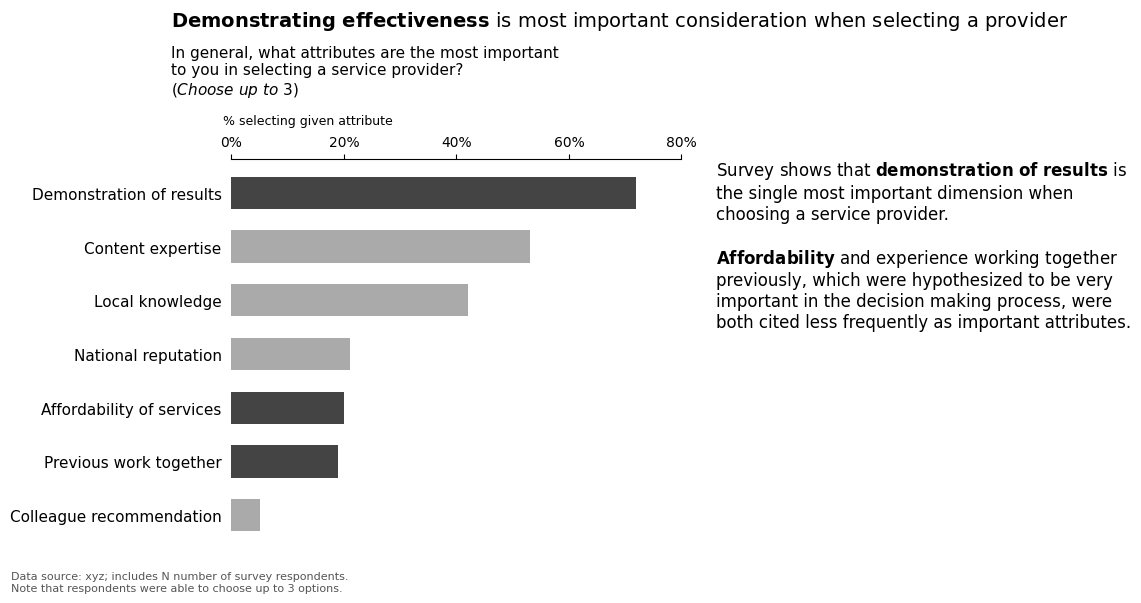

In [111]:
import matplotlib.pyplot as plt

attributes = [
    "Demonstration of results",
    "Content expertise",
    "Local knowledge",
    "National reputation",
    "Affordability of services",
    "Previous work together",
    "Colleague recommendation"
]
percentages = [72, 53, 42, 21, 20, 19, 5]  # Approximate values
bar_colors = [
    "#444444",  # Demonstration of results
    "#AAAAAA",  # Content expertise
    "#AAAAAA",  # Local knowledge
    "#AAAAAA",  # National reputation
    "#444444",  # Affordability
    "#444444",  # Previous work together
    "#AAAAAA",  # Colleague recommendation
]


fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(top=0.85)  


# Title
fig.suptitle(
    r"$\mathbf{Demonstrating\ effectiveness}$ is most important consideration when selecting a provider",
    x=0.02, y=1.05, ha="left", va="top", fontsize=14
)

# Subtitle
fig.text(
    0.02, 0.99,
    "In general, what attributes are the most important \n"
    "to you in selecting a service provider? \n"
    "$(Choose$ $up$ $to$ $3)$",
    ha="left", va="top", fontsize=11
)

# Bar chart 
bar_ax = fig.add_axes([0.08, 0.15, 0.45, 0.65]) 
bars = bar_ax.barh(attributes, percentages, color=bar_colors, height=0.6)


# Label position 
bar_ax.xaxis.set_label_position("top")
bar_ax.xaxis.tick_top()
bar_ax.set_xlabel("% selecting given attribute", x=0.17, y=1.50, fontsize=9, labelpad=8)
bar_ax.set_xlim(0, 80)    
bar_ax.invert_yaxis()    

bar_ax.set_xticks([0, 20, 40, 60, 80])
bar_ax.set_xticklabels(["0%", "20%", "40%", "60%", "80%"])

bar_ax.tick_params(axis='y', left=False) 
bar_ax.set_yticklabels(attributes, fontsize=11) 

# Remove box frame
bar_ax.spines["top"].set_visible(True)    
bar_ax.spines["right"].set_visible(False)  
bar_ax.spines["left"].set_visible(False)   
bar_ax.spines["bottom"].set_visible(False) 

text_ax = fig.add_axes([0.60, 0.15, 0.35, 0.65])
text_ax.axis("off")

para_text = (
    r"Survey shows that $\mathbf{demonstration\ of\ results}$ is the single most "
    "important dimension when choosing a service provider. \n\n" 
    r"$\mathbf{Affordability}$ and experience working together previously, which "
    r"were hypothesized to be very important in the decision making process, "
    r"were both cited less frequently as important attributes."
)

text_ax.text(
    -0.1, 1, para_text,
    ha="left", va="top",
    fontsize=12, wrap=True
)

# Data source text
fig.text(
    -0.14, 0.08,
    "Data source: xyz; includes N number of survey respondents.\n"
    "Note that respondents were able to choose up to 3 options.",
    fontsize=8, color="#555555"
)

plt.show()
